+---------+-------------+-----------+-----------------+
| DeptName|EmployeeCount|TotalSalary|        AvgSalary|
+---------+-------------+-----------+-----------------+
|    Sales|           22|     136962|6225.545454545455|
|       HR|           18|     120454|6691.888888888889|
|  Finance|           18|     121149|           6730.5|
|Marketing|           18|     125707|6983.722222222223|
|       IT|           24|     153873|         6411.375|
+---------+-------------+-----------+-----------------+



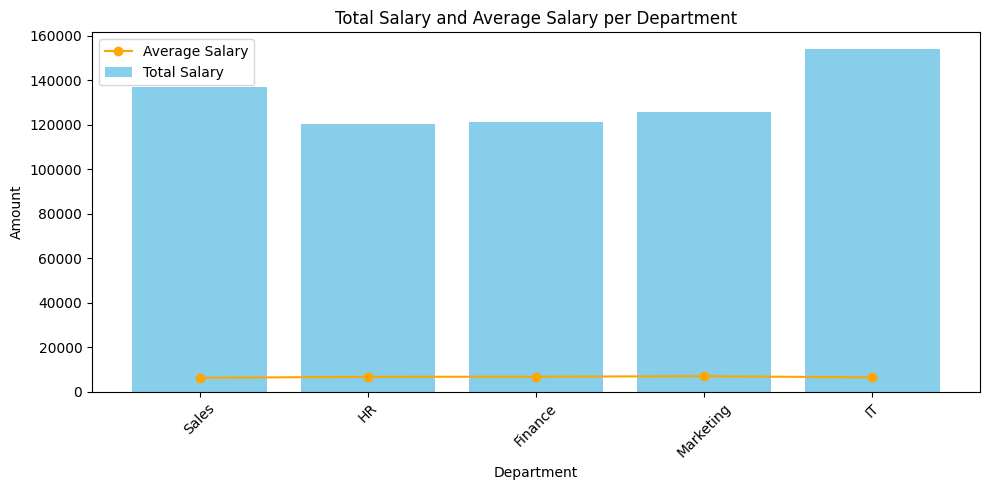

In [16]:
import random
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('CreateDataset').getOrCreate()

names = ['John', 'Jane', 'Jim', 'Jill', 'Joe', 'Jack', 'Anna', 'Lee', 'Max', 'Kate',
         'Tom', 'Sara', 'Paul', 'Linda', 'Mike', 'Rachel', 'Chris', 'Emma', 'Dan', 'Nina']
departments = ['HR', 'Marketing', 'Finance', 'IT', 'Sales']
data = []
for _ in range(100):
    name = random.choice(names)
    age = random.randint(20, 50)
    gender = 'M' if random.random() > 0.5 else 'F'
    salary = random.randint(2500, 10000)
    dept_id = random.randint(1, len(departments))  # Assuming we have 5 departments
    data.append((name, age, gender, salary, dept_id))

df = spark.createDataFrame(data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

df.createOrReplaceTempView('employees')

departments_data = [
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Finance'),
    (4, 'IT'),
    (5, 'Sales')
]
departments_df = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])
departments_df.createOrReplaceTempView('departments')

result = spark.sql('''
SELECT d.DeptName, 
       COUNT(e.Name) AS EmployeeCount, 
       SUM(e.Salary) AS TotalSalary, 
       AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

result.show()

result_pd = result.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(result_pd['DeptName'], result_pd['TotalSalary'], label='Total Salary', color='skyblue')
plt.plot(result_pd['DeptName'], result_pd['AvgSalary'], label='Average Salary', marker='o', color='orange')

plt.xlabel('Department')
plt.ylabel('Amount')
plt.title('Total Salary and Average Salary per Department')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
